In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Graphing and Visualizations

In [72]:
data = pd.read_csv("../Data/Intermediate/CDCSTDoverall2000_2020_processed.csv")

In [73]:
data.head()
data.drop(columns=["Unnamed: 0"])

,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,rate_per_100000_primary_and_secondary_syphilis,...,rate_per_100000_male_gonorrhea_multiracial,rate_per_100000_male_gonorrhea_native_hawaiian_other_pacific_islander,rate_per_100000_male_gonorrhea_white,rate_per_100000_male_primary_and_secondary_syphilis_american_indian_alaska_native,rate_per_100000_male_primary_and_secondary_syphilis_asian,rate_per_100000_male_primary_and_secondary_syphilis_black_african_american,rate_per_100000_male_primary_and_secondary_syphilis_hispanic_latino,rate_per_100000_male_primary_and_secondary_syphilis_multiracial,rate_per_100000_male_primary_and_secondary_syphilis_native_hawaiian_other_pacific_islander,rate_per_100000_male_primary_and_secondary_syphilis_white
0,2000,45001,61.0,1.0,57.0,2.0,232.6,3.8,217.4,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,22001,0.0,8.0,0.0,11.0,0.0,13.6,0.0,18.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,51001,153.0,2.0,88.0,0.0,398.7,5.2,229.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,16001,644.0,0.0,33.0,1.0,212.3,0.0,10.9,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,19001,8.0,0.0,0.0,0.0,97.6,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67581,2020,4027,982.0,19.0,192.0,4.0,459.3,8.9,89.8,1.9,...,79.9,NaN,38.4,0.0,0.0,0.0,2.9,0.0,0.0,3.0
67582,2020,8125,14.0,0.0,1.0,0.0,139.7,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67583,2020,48505,46.0,0.0,4.0,0.0,324.4,0.0,28.2,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
67584,2020,48507,42.0,0.0,11.0,0.0,354.7,0.0,92.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()

C:\Users\philb\AppData\Local\Temp\ipykernel_12576\3700150800.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()


In [75]:
df_sum.head()
df_sum = df_sum[df_sum.year >= 2002]

C:\Users\philb\AppData\Local\Temp\ipykernel_12576\258922739.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\philb\AppData\Local\Temp\ipykernel_12576\258922739.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


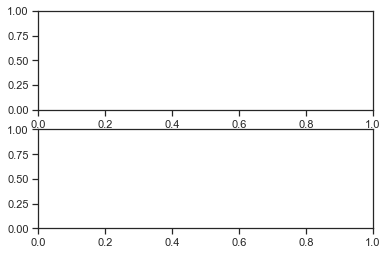

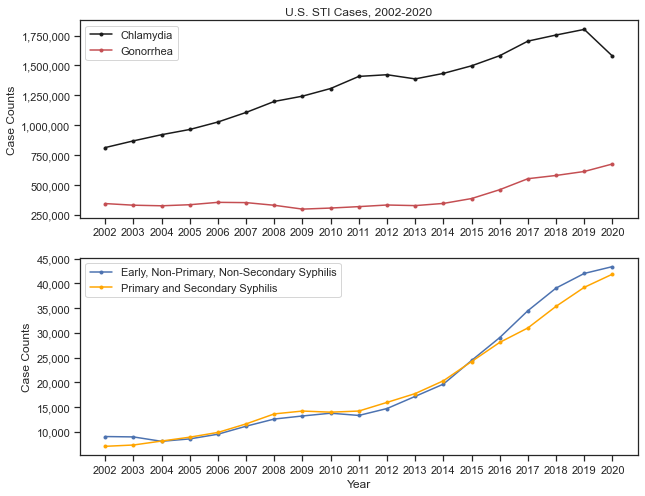

In [76]:
sns.set_theme(style="ticks", palette=None)
fig, ax = plt.subplots(nrows=2,ncols=1)
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(df_sum['cases_chlamydia'], 'k', label='Chlamydia', marker = ".")
plt.plot(df_sum['cases_gonorrhea'], 'r', label='Gonorrhea', marker = ".")
plt.legend()
plt.ylabel('Case Counts')
# plt.xticks(df_sum['year'])
plt.title("U.S. STI Cases, 2002-2020")
plt.xticks(ticks=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], labels=[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.subplot(2,1,2)
plt.plot(df_sum['cases_early_non-primary_non-secondary_syphilis'], 'b', label='Early, Non-Primary, Non-Secondary Syphilis', marker = ".")
plt.plot(df_sum['cases_primary_and_secondary_syphilis'], 'orange', label='Primary and Secondary Syphilis', marker = ".")
plt.legend()
plt.ylabel('Case Counts')
# plt.xticks(df_sum['year'])
plt.xlabel('Year')
plt.xticks(ticks=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], labels=[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('../Output/PosterPresentation/cases_gonorrhea_chlamydia_syphilis',dpi=300)
plt.show()

# Predictions

## National-Level Chlamydia Prediction

In [77]:
data = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv")
data.drop(columns=["Unnamed: 0"])
data.head()

,Unnamed: 0,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,...,pct_ind_transportation_and_warehousing_and_utilities,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate
0,0,2000,45001,61.0,1.0,57.0,2.0,232.6,3.8,217.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000,22001,0.0,8.0,0.0,11.0,0.0,13.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000,51001,153.0,2.0,88.0,0.0,398.7,5.2,229.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000,16001,644.0,0.0,33.0,1.0,212.3,0.0,10.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000,19001,8.0,0.0,0.0,0.0,97.6,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()
df_sum.head()

C:\Users\philb\AppData\Local\Temp\ipykernel_12576\1022705614.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()


,year,cases_gonorrhea,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_primary_and_secondary_syphilis,total_pop
0,2000,211107.0,382743.0,9442.0,5967.0,281962503
1,2001,245354.0,487479.0,8705.0,6099.0,284766832
2,2002,345739.0,813390.0,8427.0,6863.0,287419892
3,2003,332124.0,869331.0,8357.0,7175.0,289899614
4,2004,327136.0,920962.0,7766.0,7977.0,292594125


In [79]:
df_model = df_sum[["year", "cases_chlamydia"]]
df_model["year"] = df_model["year"].astype(int)
actual_value = df_model.at[20, "cases_chlamydia"]
df_plot = df_model
df_model = df_model[df_model["year"] <= 2019]
df_model.head(21)

C:\Users\philb\AppData\Local\Temp\ipykernel_12576\859962695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["year"] = df_model["year"].astype(int)


,year,cases_chlamydia
0,2000,382743.0
1,2001,487479.0
2,2002,813390.0
3,2003,869331.0
4,2004,920962.0
5,2005,964523.0
6,2006,1021988.0
7,2007,1099171.0
8,2008,1191991.0
9,2009,1235784.0


In [80]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_model["cases_chlamydia"], order=(2,2,0))
model_fit = model.fit()

In [81]:
 # summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        cases_chlamydia   No. Observations:                   20
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -231.431
Date:                Mon, 25 Jul 2022   AIC                            468.861
Time:                        20:44:22   BIC                            471.532
Sample:                             0   HQIC                           469.230
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3638      0.086     -4.214      0.000      -0.533      -0.195
ar.L2          0.1745      0.081      2.145      0.032       0.015       0.334
sigma2      1.689e+09   2.67e-11   6.33e+19      0.0

In [82]:
pred = model_fit.predict(20).to_frame()
fitted_value = pred.iloc[0][0]

In [83]:
print("Predicted: " + str(fitted_value) + " Actual: " + str(actual_value))

Predicted: 1837355.0071641896 Actual: 1578111.0


C:\Users\philb\AppData\Local\Temp\ipykernel_12576\3858585867.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


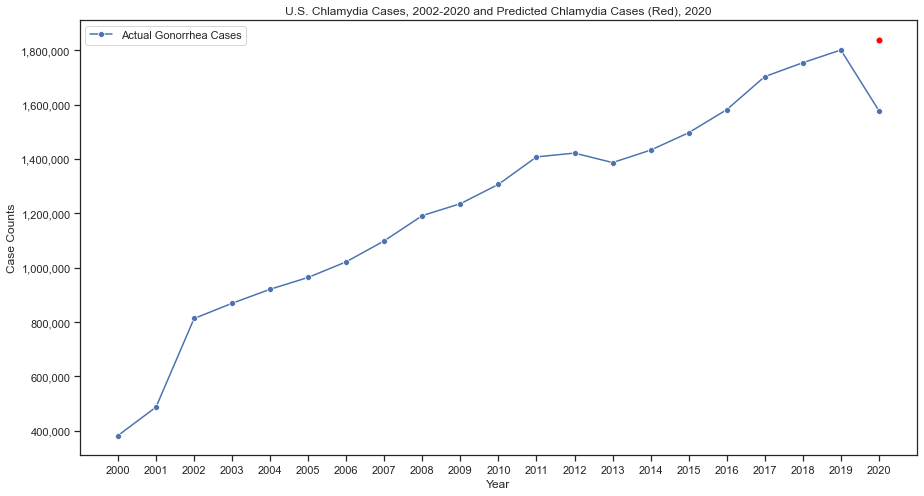

In [84]:
sns.set_theme(style="ticks", palette=None)
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_plot, x = 'year', y = 'cases_chlamydia', marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("U.S. Chlamydia Cases, 2002-2020 and Predicted Chlamydia Cases (Red), 2020")
plt.legend(labels=["Actual Gonorrhea Cases"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, fitted_value, marker='o', s=25, c="red")
plt.savefig('../Output/PosterPresentation/ModelOutputs/arima_chlamydia.png',dpi=300)
plt.show()